In [1]:
import torch
from vision.datasets.open_images import OpenImagesDataset
from vision.utils import box_utils, measurements
from vision.utils.misc import str2bool, Timer
import pathlib
import numpy as np
import logging
import sys
from PIL import Image, ImageFilter
from vision.ssd.mobilenet_v2_ssd_lite import create_mobilenetv2_ssd_lite_predictor
from vision.ssd.mobilenetv3_ssd_lite import create_mobilenetv3_small_ssd_lite
import time
import cv2
import pandas as pd
import glob
import os

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
trained_model = "./models/gaku_cornv2/mbv3-Epoch-110-Loss- 2.5993398229281106.pth" #モデルパス
nms_method = "hard"
iou_threshold = 0.5 #"The threshold of Intersection over Union."
use_2007_metric = True
#eval_dir = "eval_results" #The directory to store evaluation results
label_file = "./models/gaku_cornv2/open-images-model-labels.txt" #The label file path
class_names = [name.strip() for name in open(label_file).readlines()]

In [3]:
net = create_mobilenetv3_small_ssd_lite(len(class_names), is_test=True)
t1 = time.time()
net.load(trained_model)
net = net.to(DEVICE)
predictor = create_mobilenetv2_ssd_lite_predictor(net, nms_method=nms_method, device=DEVICE)

In [4]:
img_paths = sorted(glob.glob("./arliss_test/hikage*.JPG"))

In [5]:
print(img_paths)

['./arliss_test/hikage_000_cone.JPG', './arliss_test/hikage_010_can.JPG', './arliss_test/hikage_010_conecan.JPG', './arliss_test/hikage_020_can.JPG', './arliss_test/hikage_020_conecan.JPG', './arliss_test/hikage_030_can.JPG', './arliss_test/hikage_030_cone.JPG', './arliss_test/hikage_030_conecan.JPG', './arliss_test/hikage_040_can.JPG', './arliss_test/hikage_040_conecan.JPG', './arliss_test/hikage_050_can.JPG', './arliss_test/hikage_050_conecan.JPG', './arliss_test/hikage_060_can.JPG', './arliss_test/hikage_060_cone.JPG', './arliss_test/hikage_060_conecan.JPG', './arliss_test/hikage_070_can.JPG', './arliss_test/hikage_070_conecan.JPG', './arliss_test/hikage_080_can.JPG', './arliss_test/hikage_080_conecan.JPG', './arliss_test/hikage_090_can.JPG', './arliss_test/hikage_090_cone.JPG', './arliss_test/hikage_090_conecan.JPG', './arliss_test/hikage_100_can.JPG', './arliss_test/hikage_100_conecan.JPG', './arliss_test/hikage_110_can.JPG', './arliss_test/hikage_110_conecan.JPG', './arliss_test/

./arliss_test/hikage_000_cone.JPG
Inference time:  0.2761993408203125


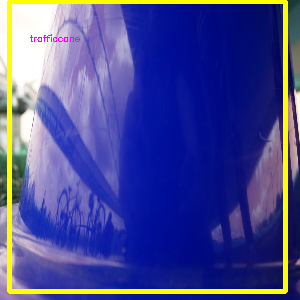

./arliss_test/hikage_010_can.JPG
Inference time:  0.01165008544921875


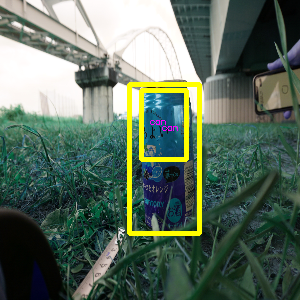

./arliss_test/hikage_010_conecan.JPG
Inference time:  0.012168645858764648


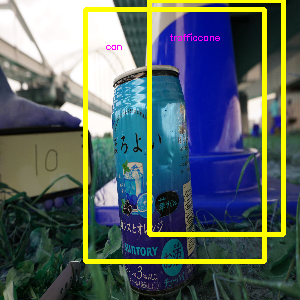

./arliss_test/hikage_020_can.JPG
Inference time:  0.012190580368041992


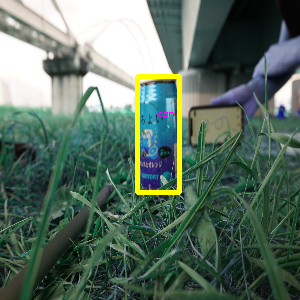

./arliss_test/hikage_020_conecan.JPG
Inference time:  0.012330293655395508


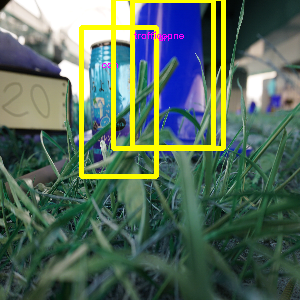

./arliss_test/hikage_030_can.JPG
Inference time:  0.01231527328491211


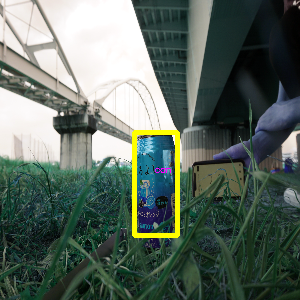

./arliss_test/hikage_030_cone.JPG
Inference time:  0.012214183807373047


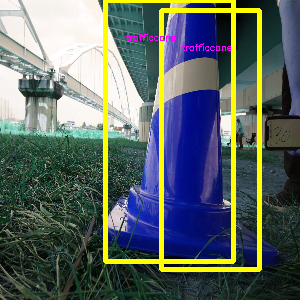

./arliss_test/hikage_030_conecan.JPG
Inference time:  0.012848377227783203


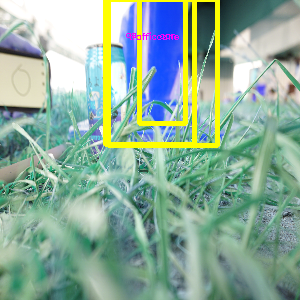

./arliss_test/hikage_040_can.JPG
Inference time:  0.01215052604675293


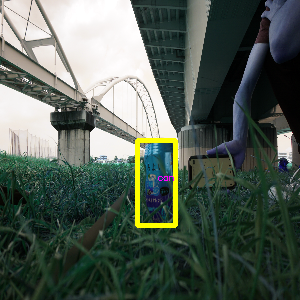

./arliss_test/hikage_040_conecan.JPG
Inference time:  0.012128591537475586


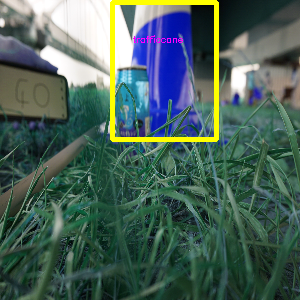

In [6]:
for img_path in img_paths[:10]:
    print(img_path)
    image = cv2.imread(img_path)
    image = cv2.resize(image, (300, 300))
    boxes, labels, probs = predictor.predict(image, 10, 0.15)
    
    for i in range(len(boxes)):
        box = boxes[i, :]
        box = list(map(int, box))
        flag = 1
        label = class_names[labels[i]]
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255, 255, 0), 4)
        cv2.putText(image, label,
                    (int(box[0]) + 20, int(box[1]) + 40),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.3,  # font scale
                    (255, 0, 255),
                    1)  # line type
    display(Image.fromarray(image))